In [1]:
%matplotlib inline

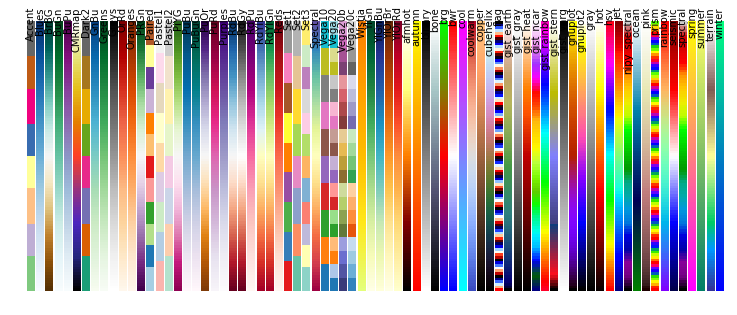

In [4]:
from pylab import *
from numpy import outer
rc('text', usetex=False)
a=outer(arange(0,1,0.01),ones(10))
figure(figsize=(10,5))
subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps=[m for m in cm.datad if not m.endswith("_r")]
maps.sort()
l=len(maps)+1
for i, m in enumerate(maps):
    subplot(1,l,i+1)
    axis("off")
    imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
    title(m,rotation=90,fontsize=10)
#savefig("colormaps.png",dpi=100,facecolor='gray')
show()

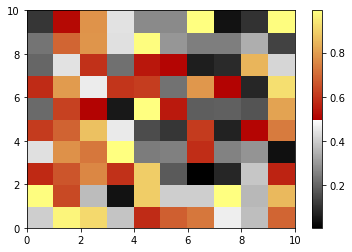

In [6]:
from pylab import *
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.5, 1.0, 0.7),
                 (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue': ((0.0, 0.0, 0.0),
                  (0.5, 1.0, 0.0),
                  (1.0, 0.5, 1.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
pcolor(rand(10,10),cmap=my_cmap)
colorbar()

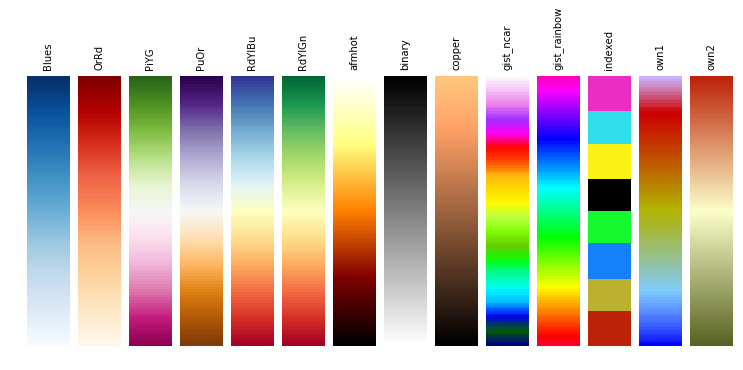

In [7]:
"""Python colormaps demo

includes:
examples for registering own color maps
utility for showing all or selected named colormaps including self-defined ones"""


import matplotlib
import matplotlib.colors as col
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


def register_own_cmaps():
    """define two example colormaps as segmented lists and register them"""
    # a good guide for choosing colors is provided at
    # http://geography.uoregon.edu/datagraphics/color_scales.htm
    #
    # example 1:
    # create own colormap from purple, blue, green, orange to red
    # cdict contains a tuple structure for 'red', 'green', and 'blue'.
    # Each color has a list of (x,y0,y1) tuples, where
    # x defines the "index" in the colormap (range 0..1), y0 is the
    # color value (0..1) left of x, and y1 the color value right of x.
    # The LinearSegmentedColormap method will linearly interpolate between
    # (x[i],y1) and (x[i+1],y0)
    # The gamma value denotes a "gamma curve" value which adjusts the brightness
    # at the bottom and top of the colormap. According to matlab documentation
    # this means:
    # colormap values are modified as c^gamma, where gamma is (1-beta) for
    # beta>0 and 1/(1+beta) for beta<=0
    cdict = {'red': ((0.0, 0.0, 0.0),
                     (0.3, 0.5, 0.5),
                     (0.6, 0.7, 0.7),
                     (0.9, 0.8, 0.8),
                     (1.0, 0.8, 0.8)),
         'green': ((0.0, 0.0, 0.0),
                   (0.3, 0.8, 0.8),
                   (0.6, 0.7, 0.7),
                   (0.9, 0.0, 0.0),
                   (1.0, 0.7, 0.7)),
         'blue': ((0.0, 1.0, 1.0),
                  (0.3, 1.0, 1.0),
                  (0.6, 0.0, 0.0),
                  (0.9, 0.0, 0.0),
                  (1.0, 1.0, 1.0))}
    cmap1 = col.LinearSegmentedColormap('my_colormap',cdict,N=256,gamma=0.75)
    cm.register_cmap(name='own1', cmap=cmap1)

    # example 2: use the "fromList() method
    startcolor = '#586323'  # a dark olive 
    midcolor = '#fcffc9'    # a bright yellow
    endcolor = '#bd2309'    # medium dark red
    cmap2 = col.LinearSegmentedColormap.from_list('own2',[startcolor,midcolor,endcolor])
    # extra arguments are N=256, gamma=1.0
    cm.register_cmap(cmap=cmap2)
    # we can skip name here as it was already defined 


def discrete_cmap(N=8):
    """create a colormap with N (N<15) discrete colors and register it"""
    # define individual colors as hex values
    cpool = [ '#bd2309', '#bbb12d', '#1480fa', '#14fa2f', '#000000',
              '#faf214', '#2edfea', '#ea2ec4', '#ea2e40', '#cdcdcd',
              '#577a4d', '#2e46c0', '#f59422', '#219774', '#8086d9' ]
    cmap3 = col.ListedColormap(cpool[0:N], 'indexed')
    cm.register_cmap(cmap=cmap3)


def show_cmaps(names=None):
    """display all colormaps included in the names list. If names is None, all
defined colormaps will be shown."""
    # base code from http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps
    matplotlib.rc('text', usetex=False)
    a=np.outer(np.arange(0,1,0.01),np.ones(10))   # pseudo image data
    f=plt.figure(figsize=(10,5))
    f.subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
    # get list of all colormap names
    # this only obtains names of built-in colormaps:
    maps=[m for m in cm.datad if not m.endswith("_r")]
    # use undocumented cmap_d dictionary instead
    maps = [m for m in cm.cmap_d if not m.endswith("_r")]
    maps.sort()
    # determine number of subplots to make
    l=len(maps)+1
    if names is not None: l=len(names)  # assume all names are correct!
    # loop over maps and plot the selected ones
    i=0
    for m in maps:
        if names is None or m in names:
            i+=1
            ax = plt.subplot(1,l,i)
            ax.axis("off")
            plt.imshow(a,aspect='auto',cmap=cm.get_cmap(m),origin="lower")
            plt.title(m,rotation=90,fontsize=10,verticalalignment='bottom')
    plt.savefig("colormaps.png",dpi=100,facecolor='gray')



if __name__ == "__main__":
    register_own_cmaps()
    discrete_cmap(8)
    show_cmaps(['indexed','Blues','OrRd','PiYG','PuOr',
                'RdYlBu','RdYlGn','afmhot','binary','copper',
                'gist_ncar','gist_rainbow','own1','own2'])

下面是一些网上收集的例子供学习参考。

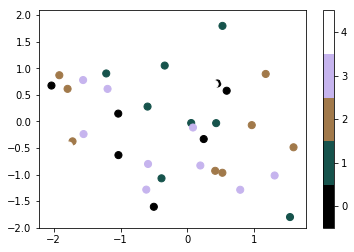

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


if __name__ == '__main__':
    N = 5

    x = np.random.randn(40)
    y = np.random.randn(40)
    c = np.random.randint(N, size=40)

    # Edit: don't use the default ('jet') because it makes @mwaskom mad...
    plt.scatter(x, y, c=c, s=50, cmap=discrete_cmap(N, 'cubehelix'))
    plt.colorbar(ticks=range(N))
    plt.clim(-0.5, N - 0.5)
plt.show()